In [1]:
from scipy.integrate import ode, solve_ivp
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect

sys.path.append('../')
from Protocols.pacing_protocol import PacingProtocol
from Protocols.leakstaircase import LeakStaircase

sys.path.append('../')
import euler_simulator

In [2]:
from Models.kylie2017IKr import Kylie2017IKr
'''
Kylie 2017 IKr
'''
protocol = LeakStaircase()
model = Kylie2017IKr(protocol)
simulator = euler_simulator.Simulator(model)
start_time = time.time()
model.name = "Kylie 2017 IKr"
times = np.arange(77000)*0.0002  # times = np.linspace(0, 15.4, 77000)
V = model.voltage(times)
g = 0.1524 * 1e3 # [pA/V]
p1 = 2.26e-4 * 1e3 # [1/s]
p2 = 0.0699 * 1e3  # [1/V]
p3 = 3.45e-5 * 1e3 # [1/s]
p4 = 0.05462 * 1e3 # [1/V]
p5 = 0.0873 * 1e3  # [1/s]
p6 = 8.91e-3 * 1e3 # [1/V]
p7 = 5.15e-3 * 1e3 # [1/s]
p8 = 0.03158 * 1e3 # [1/V]
simulator.model.set_params(g, p1, p2, p3, p4, p5, p6, p7, p8)
simulator.dt = 0.001
simulator.simulate(end_time=15.4)  
population_by_continent = {
    'O': model.open*model.active,
    'I': model.open*(1-model.active),
    'C': (1-model.open)*model.active,
    'IC': (1-model.open)*(1-model.active),    
}
print("--- %s seconds ---"%(time.time()-start_time))

Kylie dataset has been selected.
(9, 2)
--- 0.30252575874328613 seconds ---


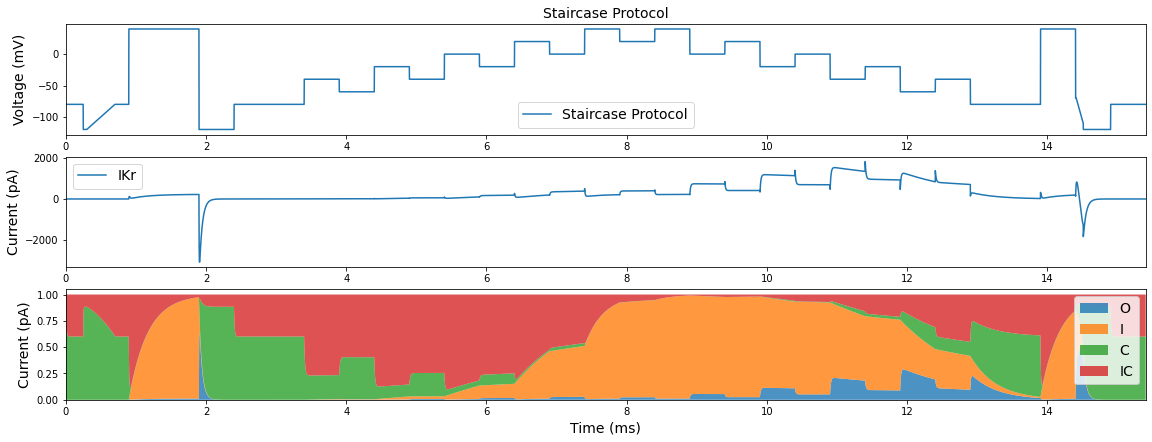

Complete


In [3]:
fig, axes = plt.subplots(3, figsize=(15, 6))
fig.suptitle(simulator.name, fontsize=14)
axes[0].set_title("Staircase Protocol", fontsize=14)
axes[0].set_xlim(0, model.times[-1])
axes[0].set_ylabel("Voltage (mV)", fontsize=14)
axes[0].plot( model.times, model.V*1000, label="Staircase Protocol")
# textstr = "GNa : %1.4f\nGNaL : %1.4f\nGto : %1.4f\nPCa : %1.4f\nGKr : %1.4f\nGKs : %1.4f\nGK1 : %1.4f\nGf : %1.4f"%(Gs[0], Gs[1], Gs[2], Gs[3], Gs[4], Gs[5], Gs[6], Gs[7])
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# axes[0].text(0.67, 0.60, textstr, transform=axs[0].transAxes, fontsize=14, verticalalignment='top', bbox=props)    
axes[0].legend(fontsize=14)
axes[0].xaxis.set_visible(True)

axes[1].set_xlim(0, model.times[-1])
axes[1].set_ylabel("Current (pA)", fontsize=14)
axes[1].plot(model.times, model.IKr*1000, label="IKr")
axes[1].legend(fontsize=14)
axes[1].xaxis.set_visible(True)

axes[2].set_xlim(0, model.times[-1])
axes[2].set_xlabel("Time (ms)", fontsize=14)
axes[2].set_ylabel("Current (pA)", fontsize=14)
axes[2].stackplot(model.times, population_by_continent.values(), labels=population_by_continent.keys(), alpha=0.8)
axes[2].legend(fontsize=14)
axes[2].xaxis.set_visible(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.87, wspace=0.5, hspace=0.2)
# fig.tight_layout()#rect=[0.5, 0.5, 0.5, 0.5]
plt.show()
fig.savefig(os.path.join('VC_results', 'Kylie2017IKr-StaircaseVC'), dpi=100)
print("Complete")